In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from ggplot import *
from fancyimpute import KNN

Using TensorFlow backend.


In [2]:
os.chdir("C:/Users/rakshith/Desktop/DataSets/Edwisor/credit card")

In [3]:
cr_data=pd.read_csv("credit-card-data.csv")

In [4]:
cr_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
cr_data.shape

(8950, 18)

In [6]:
cr_data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [7]:
cr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [8]:
cr_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
cr_data['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [10]:
cr_data.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

# Missing Value Analysis

In [11]:
missing_data=pd.DataFrame(cr_data.isnull().sum())

In [12]:
missing_data=missing_data.reset_index()

In [13]:
missing_data.columns=['Feature_name','Missing_count']

In [14]:
missing_data

,Feature_name,Missing_count
0,CUST_ID,0
1,BALANCE,0
2,BALANCE_FREQUENCY,0
3,PURCHASES,0
4,ONEOFF_PURCHASES,0
5,INSTALLMENTS_PURCHASES,0
6,CASH_ADVANCE,0
7,PURCHASES_FREQUENCY,0
8,ONEOFF_PURCHASES_FREQUENCY,0
9,PURCHASES_INSTALLMENTS_FREQUENCY,0


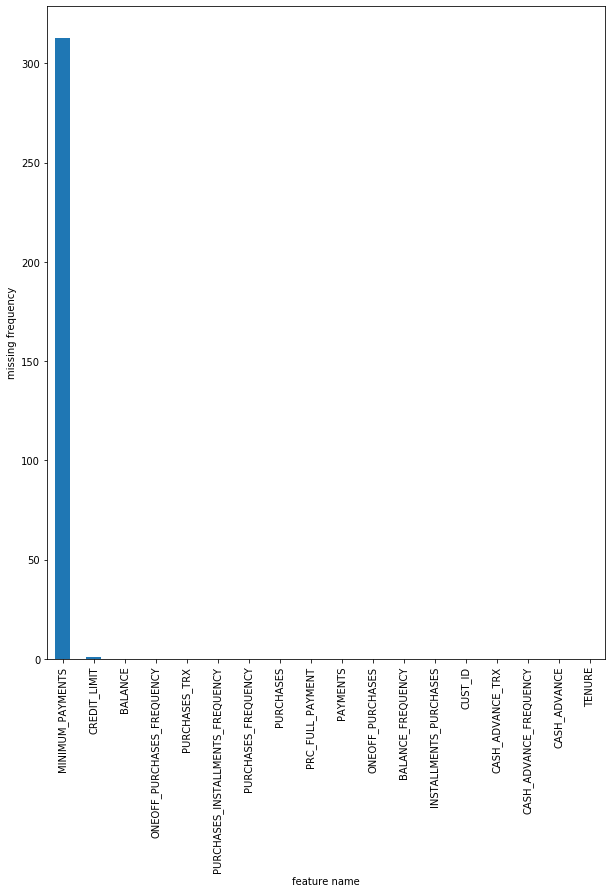

In [15]:
fig,ax=plt.subplots(figsize=(10,12))
missing_data.groupby('Feature_name').max().sort_values('Missing_count',ascending=False)['Missing_count'].plot.bar()
ax.set_xlabel('feature name')
ax.set_ylabel('missing frequency')
plt.show()

1. minimum payments contain 313 missing values
2. credit limit contains one missing value

In [16]:
cr_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [17]:
cr_data.loc[:,'MINIMUM_PAYMENTS'].head(20)

0       139.509787
1      1072.340217
2       627.284787
3              NaN
4       244.791237
5      2407.246035
6       198.065894
7       532.033990
8       311.963409
9       100.302262
10     2172.697765
11      155.549069
12      490.207013
13      251.137986
14      989.962866
15     2109.906490
16      376.579631
17       73.203221
18      744.613395
19    12465.549380
Name: MINIMUM_PAYMENTS, dtype: float64

In [18]:
print(cr_data.loc[:,'MINIMUM_PAYMENTS'].mean())
print(cr_data.loc[:,'MINIMUM_PAYMENTS'].median())


864.2065423050814
312.343947


In [19]:
(864.2065423050814+312.343947)/2

588.2752446525407

In [20]:
print("Count of minimum payments less than 588.275 is {}".format(sum(cr_data['MINIMUM_PAYMENTS']<588.275)))

Count of minimum payments less than 588.275 is 5746


In [21]:
# since majority of the data are closer towards the median than that of mean, will impute missing data with median
cr_data['MINIMUM_PAYMENTS'].fillna(cr_data['MINIMUM_PAYMENTS'].median(),inplace=True)
cr_data['CREDIT_LIMIT'].fillna(cr_data['CREDIT_LIMIT'].median(),inplace=True)

In [22]:
cr_data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Outlier Analysis

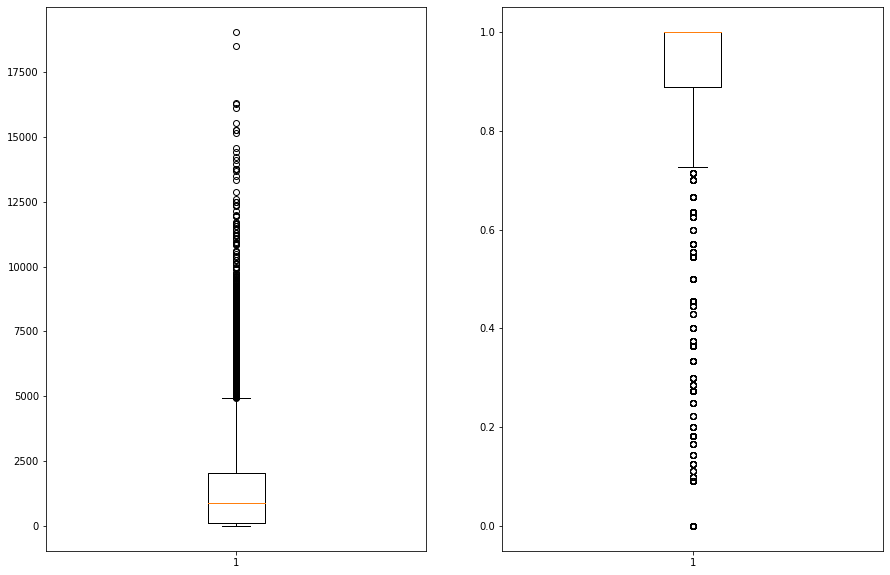

In [23]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
ax[0].boxplot(cr_data['BALANCE'])
ax[1].boxplot(cr_data['BALANCE_FREQUENCY'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x18bd5afc630>,
 'caps': [<matplotlib.lines.Line2D at 0x18bd5afcd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x18bd5afc240>,
 'medians': [<matplotlib.lines.Line2D at 0x18bd5b08400>,
 'fliers': [<matplotlib.lines.Line2D at 0x18bd5b08748>,
 'means': []}

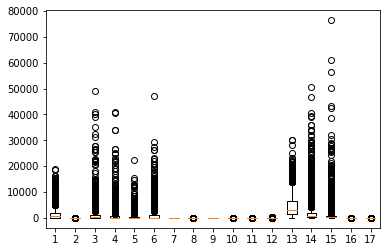

In [24]:
plt.boxplot([cr_data['BALANCE'],cr_data['BALANCE_FREQUENCY'],cr_data['PURCHASES'],cr_data['ONEOFF_PURCHASES'],cr_data['INSTALLMENTS_PURCHASES']
            ,cr_data['CASH_ADVANCE'],cr_data['PURCHASES_FREQUENCY'],cr_data['ONEOFF_PURCHASES_FREQUENCY'],cr_data['PURCHASES_INSTALLMENTS_FREQUENCY'],
            cr_data['CASH_ADVANCE_FREQUENCY'],cr_data['CASH_ADVANCE_TRX'],cr_data['PURCHASES_TRX'],cr_data['CREDIT_LIMIT'],cr_data['PAYMENTS'],
            cr_data['MINIMUM_PAYMENTS'],cr_data['PRC_FULL_PAYMENT'],cr_data['TENURE']])

In [25]:
for i in cr_data.iloc[:,1:].columns:
    print(i)
    q75,q25=np.percentile(cr_data.loc[:,i],[75,25])
    iqr=q75-q25
    minimum=q25-iqr*3
    maximum=q75+iqr*3
    print(minimum)
    print(maximum)
    print(sum(cr_data.loc[:,i]<minimum))
    print(sum(cr_data.loc[:,i]>maximum))

BALANCE
-5649.292444500001
7831.714395500001
0
194
BALANCE_FREQUENCY
0.5555559999999997
1.333333
1173
0
PURCHASES
-3171.8500000000004
4321.615000000001
0
391
ONEOFF_PURCHASES
-1732.2150000000001
2309.6200000000003
0
566
INSTALLMENTS_PURCHASES
-1405.9125
1874.5499999999997
0
395
CASH_ADVANCE
-3341.4634177499993
4455.284556999999
0
486
PURCHASES_FREQUENCY
-2.416669
3.416669
0
0
ONEOFF_PURCHASES_FREQUENCY
-0.8999999999999999
1.2
0
0
PURCHASES_INSTALLMENTS_FREQUENCY
-2.25
3.0
0
0
CASH_ADVANCE_FREQUENCY
-0.666666
0.8888879999999999
0
67
CASH_ADVANCE_TRX
-12.0
16.0
0
368
PURCHASES_TRX
-47.0
65.0
0
356
CREDIT_LIMIT
-13100.0
21200.0
0
10
PAYMENTS
-4170.298286249999
6454.708768999999
0
402
MINIMUM_PAYMENTS
-1682.7098852499996
2642.2810402499995
0
470
PRC_FULL_PAYMENT
-0.4285709999999999
0.5714279999999999
0
1081
TENURE
12.0
12.0
1366
0


In [26]:
# For all the data over the threshold value would be replaced with threshold values except for tenure.
for i in cr_data.iloc[:,1:17].columns:
    print(i)
    q75,q25=np.percentile(cr_data.loc[:,i],[75,25])
    iqr=q75-q25
    minimum=q25-iqr*3
    maximum=q75+iqr*3
    
    cr_data.loc[:,i]=np.where(cr_data.loc[:,i]<minimum,minimum,cr_data.loc[:,i])
    cr_data.loc[:,i]=np.where(cr_data.loc[:,i]>maximum,maximum,cr_data.loc[:,i])


BALANCE
BALANCE_FREQUENCY
PURCHASES
ONEOFF_PURCHASES
INSTALLMENTS_PURCHASES
CASH_ADVANCE
PURCHASES_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY
PURCHASES_INSTALLMENTS_FREQUENCY
CASH_ADVANCE_FREQUENCY
CASH_ADVANCE_TRX
PURCHASES_TRX
CREDIT_LIMIT
PAYMENTS
MINIMUM_PAYMENTS
PRC_FULL_PAYMENT


In [27]:
cr_data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [28]:
cr_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,4455.284557,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12


In [29]:
cr_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1517.851008,0.906755,838.825025,427.667802,342.244404,807.179080,0.490351,0.202458,0.364437,0.134469,2.778436,13.043911,4490.427724,1494.054330,624.087824,0.117641,11.517318
std,1882.585437,0.161330,1144.158119,688.293846,515.002472,1321.231085,0.401371,0.298336,0.397448,0.197223,4.429349,16.766616,3617.434961,1651.341892,700.404979,0.202142,1.338331
min,0.000000,0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,7831.714396,1.000000,4321.615000,2309.620000,1874.550000,4455.284557,1.000000,1.000000,1.000000,0.888888,16.000000,65.000000,21200.000000,6454.708769,2642.281040,0.571428,12.000000


# Deriving New KPI'S

1. Monthly Average Purchases
2. Advance Cash Amount
3. Usage Limit
4. Minimum Payment Ratio
5. Type of Purchase Being Made

In [30]:
cr_data['month_avg_purchase']=cr_data['PURCHASES']/cr_data['TENURE']   # AVerage purchase done monthly
cr_data['month_cash_advance']=cr_data['CASH_ADVANCE']/cr_data['TENURE']# Cash taken in advance monthly
cr_data['usage_limit']=cr_data['BALANCE']/cr_data['CREDIT_LIMIT']# Is the customer making full use of the credit limit
cr_data['min_payment_ratio']=cr_data['PAYMENTS']/cr_data['MINIMUM_PAYMENTS'] # ratio of minimum payments made

In [31]:
cr_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,month_avg_purchase,month_cash_advance,usage_limit,min_payment_ratio
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2.0,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,4455.284557,0.000000,0.000000,0.000000,...,0.0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,371.273713,0.457495,3.826241
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12.0,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1.0,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,0.222223,0.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1.0,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075


In [32]:
cr_data.iloc[:,4:6].head(10)

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
5,0.00,1333.28
6,2309.62,688.38
7,0.00,436.20
8,661.49,200.00
9,1281.60,0.00


from the above table it is clear that both type of purchases are done, and  either of the purchases is also done, and few does indicate neither of the purchases being made.

In [33]:
cr_data[(cr_data['ONEOFF_PURCHASES']==0) & (cr_data['INSTALLMENTS_PURCHASES']==0)].shape # none of the purchase done

(2042, 22)

In [34]:
cr_data[(cr_data['ONEOFF_PURCHASES']!=0) & (cr_data['INSTALLMENTS_PURCHASES']==0)].shape # ONEOFF_PURCHASE only

(1874, 22)

In [35]:
cr_data[(cr_data['ONEOFF_PURCHASES']==0) & (cr_data['INSTALLMENTS_PURCHASES']!=0)].shape # INSTALLMENT PURCHASE ONLY

(2260, 22)

In [36]:
cr_data[(cr_data['ONEOFF_PURCHASES']!=0) & (cr_data['INSTALLMENTS_PURCHASES']!=0)].shape # Both type of purchase done

(2774, 22)

In [37]:
# Creating new variables for the purchase type
cr_data['NONE_of_PURCHASE']=0
cr_data.loc[(cr_data['ONEOFF_PURCHASES']==0) & (cr_data['INSTALLMENTS_PURCHASES']==0),'NONE_of_PURCHASE']=1

cr_data['BOTH_of_PURCHASE']=0
cr_data.loc[(cr_data['ONEOFF_PURCHASES']!=0) & (cr_data['INSTALLMENTS_PURCHASES']!=0),'BOTH_of_PURCHASE']=1

cr_data['ONEOFF_ONLY']=0
cr_data.loc[(cr_data['ONEOFF_PURCHASES']!=0) & (cr_data['INSTALLMENTS_PURCHASES']==0),'ONEOFF_ONLY']=1

cr_data['INSTALLMENT_ONLY']=0
cr_data.loc[(cr_data['ONEOFF_PURCHASES']==0) & (cr_data['INSTALLMENTS_PURCHASES']!=0),'INSTALLMENT_ONLY']=1

In [38]:
cr_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,month_avg_purchase,month_cash_advance,usage_limit,min_payment_ratio,NONE_of_PURCHASE,BOTH_of_PURCHASE,ONEOFF_ONLY,INSTALLMENT_ONLY
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0.000000,12,7.950000,0.000000,0.040901,1.446508,0,0,0,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,4455.284557,0.000000,0.000000,0.000000,...,0.222222,12,0.000000,371.273713,0.457495,3.826241,1,0,0,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0.000000,12,64.430833,0.000000,0.332687,0.991682,0,0,1,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,0.000000,12,124.916667,17.149001,0.222223,0.000000,0,0,1,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0.000000,12,1.333333,0.000000,0.681429,2.771075,0,0,1,0


In [39]:
#cr_data.to_csv('credit_clean_data.csv',index=False)

In [40]:
# DROPPING CUST_ID
cr_data=cr_data.drop(['CUST_ID'],axis=1)

# Feature Scaling

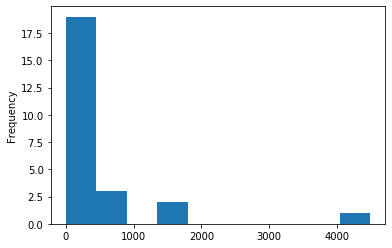

In [41]:
cr_data[cr_data.columns].mean().plot('hist')

Text(0, 0.5, 'Frequency')

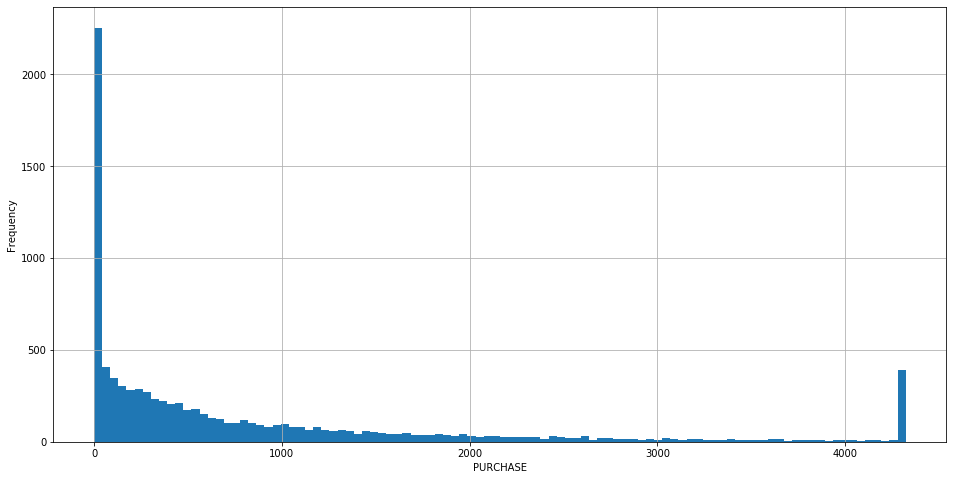

In [42]:
cr_data.PURCHASES.hist(bins=100,figsize=(16,8))
plt.xlabel("PURCHASE")
plt.ylabel("Frequency")

Text(0, 0.5, 'FREQUENCY')

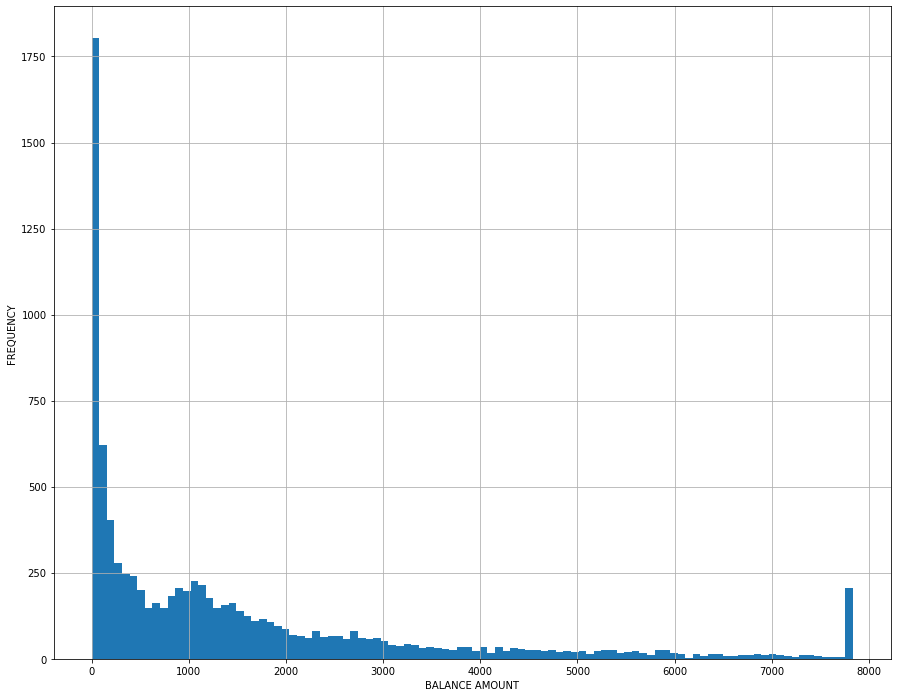

In [43]:
cr_data.BALANCE.hist(bins=100,figsize=(15,12))
plt.xlabel('BALANCE AMOUNT')
plt.ylabel('FREQUENCY')

Text(0, 0.5, 'frequency')

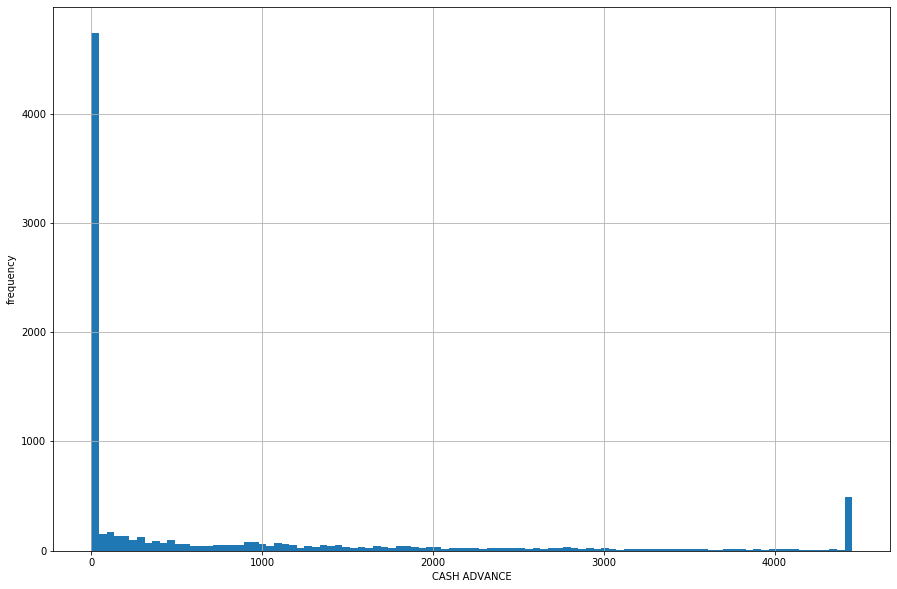

In [44]:
cr_data.CASH_ADVANCE.hist(bins=100,figsize=(15,10))
plt.xlabel('CASH ADVANCE')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

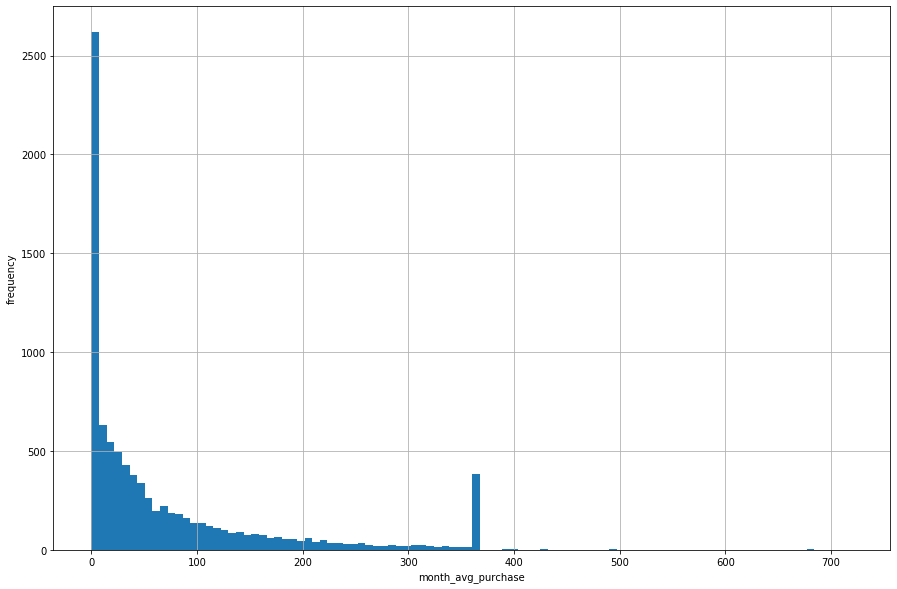

In [45]:
cr_data.month_avg_purchase.hist(bins=100,figsize=(15,10))
plt.xlabel('month_avg_purchase')
plt.ylabel('frequency')

In [46]:
# NORMALIZING THE DATA
for i in cr_data.columns:
    cr_data[i]=(cr_data[i]-min(cr_data[i]))/(max(cr_data[i]-min(cr_data[i])))

In [47]:
cr_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,month_avg_purchase,month_cash_advance,usage_limit,min_payment_ratio,NONE_of_PURCHASE,BOTH_of_PURCHASE,ONEOFF_ONLY,INSTALLMENT_ONLY
0,0.005222,0.590909,0.022075,0.000000,0.050892,0.00000,0.166667,0.000000,0.083333,0.00000,...,0.000000,1.0,0.011038,0.000000,0.002571,0.000211,0.0,0.0,0.0,1.0
1,0.408910,0.795455,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.28125,...,0.388889,1.0,0.000000,0.500000,0.028755,0.000559,1.0,0.0,0.0,0.0
2,0.318595,1.000000,0.178908,0.334761,0.000000,0.00000,1.000000,1.000000,0.000000,0.00000,...,0.000000,1.0,0.089454,0.000000,0.020911,0.000145,0.0,0.0,1.0,0.0
3,0.212810,0.181818,0.346861,0.649025,0.000000,0.04619,0.083333,0.083333,0.000000,0.09375,...,0.000000,1.0,0.173431,0.023095,0.013968,0.000000,0.0,0.0,1.0,0.0
4,0.104411,1.000000,0.003702,0.006928,0.000000,0.00000,0.083333,0.083333,0.000000,0.00000,...,0.000000,1.0,0.001851,0.000000,0.042830,0.000405,0.0,0.0,1.0,0.0


In [48]:
#cr_data.to_csv("credit_data.csv",index=False)

In [49]:
credit_original_data=cr_data

# Visualizations with new KPI

In [50]:
none_indices=cr_data[cr_data['NONE_of_PURCHASE']==1].index

both_indices=cr_data[cr_data['BOTH_of_PURCHASE']==1].index

oneoff_indices=cr_data[cr_data['ONEOFF_ONLY']==1].index

installment_indices=cr_data[cr_data['INSTALLMENT_ONLY']==1].index

In [51]:
# minimum payment plot
min_pay_df=pd.DataFrame({'purchase_type':['NONE OF PURCHASE','BOTH OF PURCHASE','ONEOFF','INSTALLMENT'],'min_payment_ratio':
                        [sum(cr_data.loc[none_indices,'min_payment_ratio']),sum(cr_data.loc[both_indices,'min_payment_ratio']),
                         sum(cr_data.loc[oneoff_indices,'min_payment_ratio']),sum(cr_data.loc[installment_indices,'min_payment_ratio'])]})

In [52]:
min_pay_df

,purchase_type,min_payment_ratio
0,NONE OF PURCHASE,2.653689
1,BOTH OF PURCHASE,2.740123
2,ONEOFF,1.465425
3,INSTALLMENT,4.361315


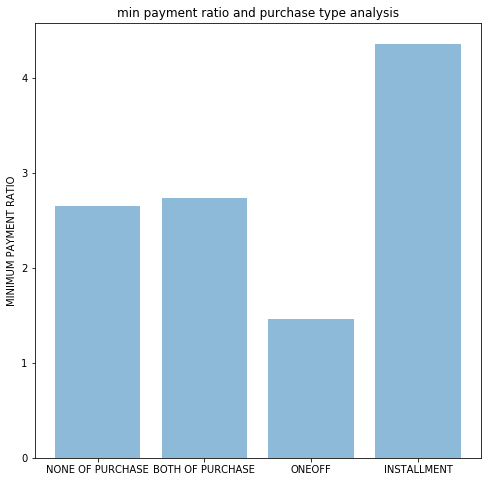

In [53]:
fig=plt.subplots(figsize=(8,8))
plt.bar(min_pay_df['purchase_type'], min_pay_df['min_payment_ratio'], align='center', alpha=0.5)
plt.xticks(min_pay_df['purchase_type'])
plt.ylabel('MINIMUM PAYMENT RATIO')
plt.title('min payment ratio and purchase type analysis')

plt.show()

It can be noted that customers with Installment purchases are paying the credit card bill regularly

In [54]:
# Usage limit plot
usage_limit_df=pd.DataFrame({'purchase_type':['NONE OF PURCHASE','BOTH OF PURCHASE','ONEOFF','INSTALLMENT'],'usage_limit':
                        [sum(cr_data.loc[none_indices,'usage_limit']),sum(cr_data.loc[both_indices,'usage_limit']),
                         sum(cr_data.loc[oneoff_indices,'usage_limit']),sum(cr_data.loc[installment_indices,'usage_limit'])]})

In [55]:
usage_limit_df

,purchase_type,usage_limit
0,NONE OF PURCHASE,73.234046
1,BOTH OF PURCHASE,60.791205
2,ONEOFF,44.643792
3,INSTALLMENT,38.271069


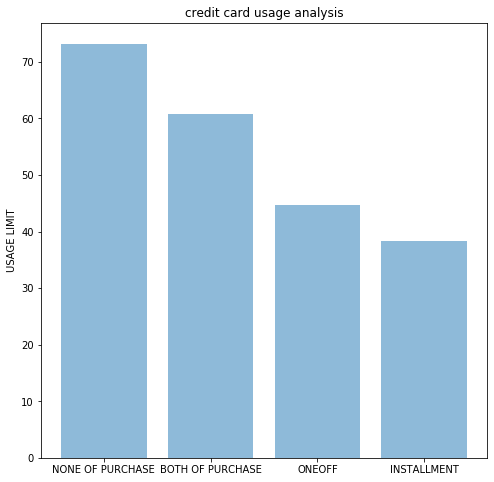

In [56]:
fig=plt.subplots(figsize=(8,8))
plt.bar(usage_limit_df['purchase_type'],usage_limit_df['usage_limit'], align='center', alpha=0.5)
plt.xticks(usage_limit_df['purchase_type'])
plt.ylabel('USAGE LIMIT')
plt.title('credit card usage analysis')
plt.show()

As seen in the above graph INSTALLMENT TYPE purchases are maintaining good credit scores and None of the purchase types are having poor credit scores

In [57]:
# monthly cash advance plot
month_cash_advance_df=pd.DataFrame({'purchase_type':['NONE OF PURCHASE','BOTH OF PURCHASE','ONEOFF','INSTALLMENT'],'month_cash_advance':
                        [sum(cr_data.loc[none_indices,'month_cash_advance']),sum(cr_data.loc[both_indices,'month_cash_advance']),
                         sum(cr_data.loc[oneoff_indices,'month_cash_advance']),sum(cr_data.loc[installment_indices,'month_cash_advance'])]})

In [58]:
month_cash_advance_df

,purchase_type,month_cash_advance
0,NONE OF PURCHASE,420.876738
1,BOTH OF PURCHASE,201.859670
2,ONEOFF,165.733567
3,INSTALLMENT,97.001445


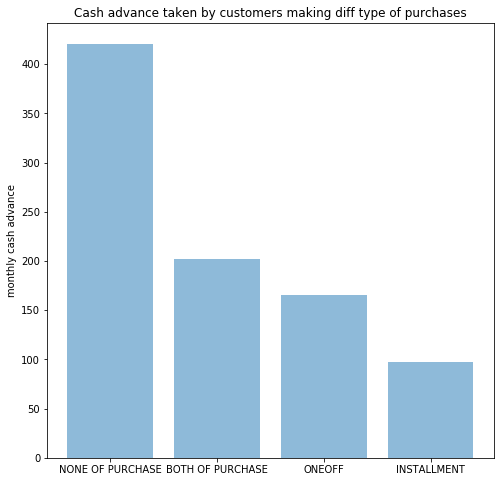

In [59]:
fig=plt.subplots(figsize=(8,8))
plt.bar(month_cash_advance_df['purchase_type'],month_cash_advance_df['month_cash_advance'], align='center', alpha=0.5)
plt.xticks(month_cash_advance_df['purchase_type'])
plt.ylabel('monthly cash advance')
plt.title('Cash advance taken by customers making diff type of purchases')
plt.show()

As seen from the above graph customers with INSTALLMENT type are taking less cash in advance, where as customers making neither of the purchases are taking more cash in advance

In [60]:
# Monthly average purchase plot
month_avg_purchase_df=pd.DataFrame({'purchase_type':['NONE OF PURCHASE','BOTH OF PURCHASE','ONEOFF','INSTALLMENT'],'month_avg_purchase':
                        [sum(cr_data.loc[none_indices,'month_avg_purchase']),sum(cr_data.loc[both_indices,'month_avg_purchase']),
                         sum(cr_data.loc[oneoff_indices,'month_avg_purchase']),sum(cr_data.loc[installment_indices,'month_avg_purchase'])]})

In [61]:
month_avg_purchase_df

,purchase_type,month_avg_purchase
0,NONE OF PURCHASE,0.000000
1,BOTH OF PURCHASE,594.087901
2,ONEOFF,163.694553
3,INSTALLMENT,141.379995


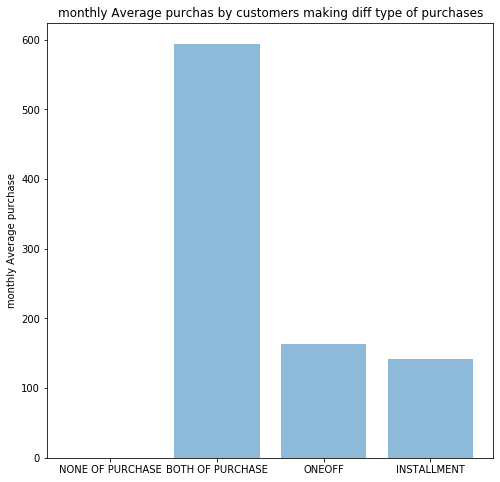

In [62]:
fig=plt.subplots(figsize=(8,8))
plt.bar(month_avg_purchase_df['purchase_type'],month_avg_purchase_df['month_avg_purchase'], align='center', alpha=0.5)
plt.xticks(month_avg_purchase_df['purchase_type'])
plt.ylabel('monthly Average purchase')
plt.title('monthly Average purchas by customers making diff type of purchases')
plt.show()

As seen from the above graph Customers with both type of purchases are making more number of purchases

In [63]:
# BALANCE plot
BALANCE_df=pd.DataFrame({'purchase_type':['NONE OF PURCHASE','BOTH OF PURCHASE','ONEOFF','INSTALLMENT'],'BALANCE':
                        [sum(cr_data.loc[none_indices,'BALANCE']),sum(cr_data.loc[both_indices,'BALANCE']),
                         sum(cr_data.loc[oneoff_indices,'BALANCE']),sum(cr_data.loc[installment_indices,'BALANCE'])]})

In [64]:
BALANCE_df

,purchase_type,BALANCE
0,NONE OF PURCHASE,548.938662
1,BOTH OF PURCHASE,613.413772
2,ONEOFF,337.413889
3,INSTALLMENT,234.817683


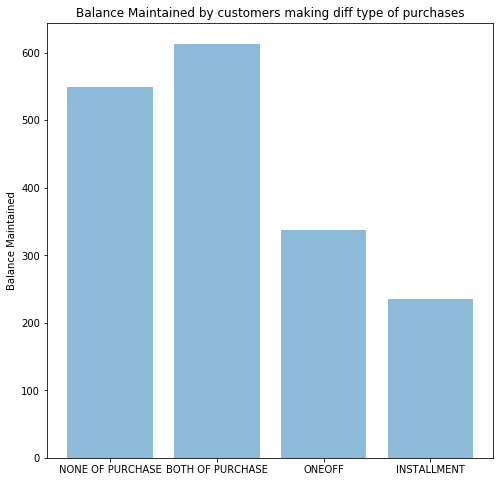

In [65]:
fig=plt.subplots(figsize=(8,8))
plt.bar(BALANCE_df['purchase_type'],BALANCE_df['BALANCE'], align='center', alpha=0.5)
plt.xticks(BALANCE_df['purchase_type'])
plt.ylabel('Balance Maintained')
plt.title('Balance Maintained by customers making diff type of purchases')
plt.show()

Customers making both type of purchases are maintaining good balance

# Correlation plot

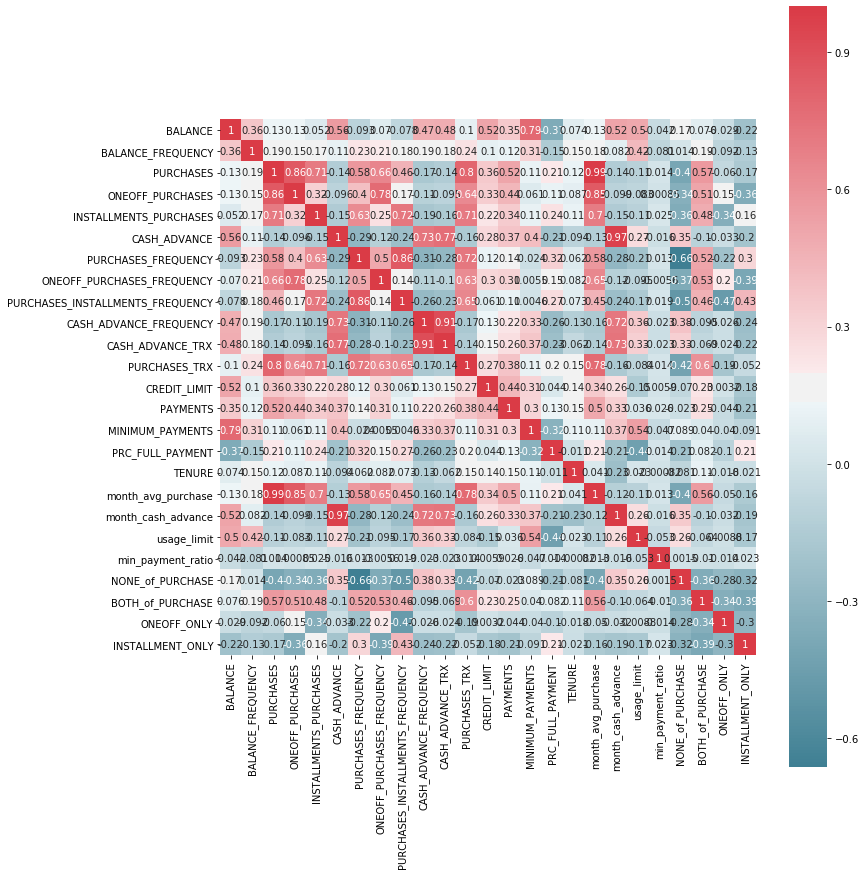

In [66]:
f, ax = plt.subplots(figsize=(12, 14))

corr = cr_data.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

Since new KPI'S were derived from the existing data, they are showing the correlation with each other, Hence dropping features that were used to derive new features.

In [67]:
#cr_data=pd.read_csv('credit_data.csv')

In [68]:
drop_col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','CREDIT_LIMIT']

In [69]:
cr_data=cr_data.drop(drop_col,axis=1)

In [70]:
cr_data.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT',
       'month_avg_purchase', 'month_cash_advance', 'usage_limit',
       'min_payment_ratio', 'NONE_of_PURCHASE', 'BOTH_of_PURCHASE',
       'ONEOFF_ONLY', 'INSTALLMENT_ONLY'],
      dtype='object')

In [71]:
cr_data.shape

(8950, 18)

In [72]:
cr_data.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,month_avg_purchase,month_cash_advance,usage_limit,min_payment_ratio,NONE_of_PURCHASE,BOTH_of_PURCHASE,ONEOFF_ONLY,INSTALLMENT_ONLY
0,0.590909,0.000000,0.050892,0.166667,0.000000,0.083333,0.00000,0.0000,0.030769,0.000000,0.011038,0.000000,0.002571,0.000211,0.0,0.0,0.0,1.0
1,0.795455,0.000000,0.000000,0.000000,0.000000,0.000000,0.28125,0.2500,0.000000,0.388889,0.000000,0.500000,0.028755,0.000559,1.0,0.0,0.0,0.0
2,1.000000,0.334761,0.000000,1.000000,1.000000,0.000000,0.00000,0.0000,0.184615,0.000000,0.089454,0.000000,0.020911,0.000145,0.0,0.0,1.0,0.0
3,0.181818,0.649025,0.000000,0.083333,0.083333,0.000000,0.09375,0.0625,0.015385,0.000000,0.173431,0.023095,0.013968,0.000000,0.0,0.0,1.0,0.0
4,1.000000,0.006928,0.000000,0.083333,0.083333,0.000000,0.00000,0.0000,0.015385,0.000000,0.001851,0.000000,0.042830,0.000405,0.0,0.0,1.0,0.0


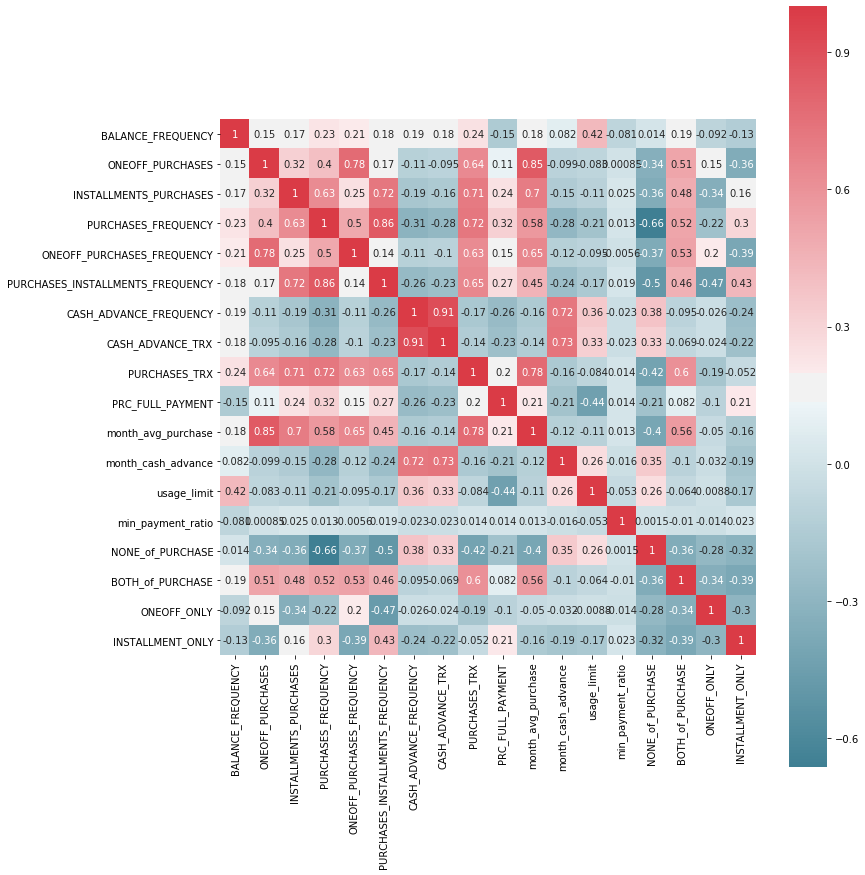

In [73]:
# Replotting the correlation matrix
f, ax = plt.subplots(figsize=(12, 14))

corr = cr_data.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

Further reduction in the data would be done by principal component analysis(PCA) as correlation amongst the features exist in many numbers.

In [74]:
cr_data.shape

(8950, 18)

# PCA

In [75]:
var_ratio={}
for n in range(3,15):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_data)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [76]:
var_ratio

{3: 0.697766426233793,
 4: 0.7790717470444726,
 5: 0.8368286907668028,
 6: 0.8875894603834812,
 7: 0.924784497835647,
 8: 0.9511230114958704,
 9: 0.9707559813212928,
 10: 0.981171090023786,
 11: 0.9877936264331186,
 12: 0.9935228060980319,
 13: 0.9964568569951935,
 14: 0.9990737116781744}

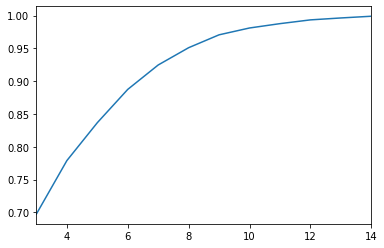

In [77]:
pd.Series(var_ratio).plot()

# 5 PC's are explaining variance of ~84, 6 PC's are explaining variance of ~88, Hence based on trial and error number of PC would be chosen

# Using 6 PC to create the clusters

In [78]:

pc6=PCA(n_components=6).fit(cr_data)
cr_reduced=pc6.fit_transform(cr_data)


In [79]:
cr6_df=pd.DataFrame(cr_reduced)

In [80]:
cr6_df.shape

(8950, 6)

In [81]:
# Variance explained by each of PC's
pd.Series(pc6.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)]) 

PC_0    0.360906
PC_1    0.195892
PC_2    0.140968
PC_3    0.081305
PC_4    0.057757
PC_5    0.050761
dtype: float64

In [82]:
pc6.components_.T # Value's carried by PC's of all 17 features 

array([[ 9.85251885e-02, -1.58908758e-01, -2.17852957e-01,
        -6.63897065e-01,  2.64644463e-01, -4.92445617e-01],
       [ 1.95209534e-01, -2.85434413e-01,  1.37398819e-01,
         3.15977286e-02,  1.71064997e-01, -9.77398623e-03],
       [ 2.52370777e-01,  3.30963481e-02, -1.06774671e-01,
        -5.34111269e-03,  6.04519728e-02,  3.75088253e-02],
       [ 4.60216028e-01,  9.48256909e-02,  4.97414684e-02,
        -1.61111353e-01,  8.69750560e-02,  1.70557689e-02],
       [ 2.01669470e-01, -2.97184494e-01,  1.65846948e-01,
        -4.89964863e-03,  2.04308057e-01, -4.11381834e-02],
       [ 4.19590941e-01,  2.32476119e-01, -1.72090981e-01,
        -1.08034081e-01, -4.69313080e-02,  4.45431220e-02],
       [-9.80239126e-02, -1.03776318e-01, -1.73660625e-01,
        -2.28554649e-01,  1.31506302e-01,  4.41531380e-01],
       [-1.09715872e-01, -1.26239649e-01, -2.09855562e-01,
        -2.87044760e-01,  1.64821443e-01,  6.07044576e-01],
       [ 2.61922682e-01, -9.67684090e-02, -2.630

In [83]:
pc6_df=pd.DataFrame(pc6.components_.T,columns=['PC_'+str(i) for i in range(6)],index=cr_data.columns)

In [84]:
pc6_df

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
BALANCE_FREQUENCY,0.098525,-0.158909,-0.217853,-0.663897,0.264644,-0.492446
ONEOFF_PURCHASES,0.195210,-0.285434,0.137399,0.031598,0.171065,-0.009774
INSTALLMENTS_PURCHASES,0.252371,0.033096,-0.106775,-0.005341,0.060452,0.037509
PURCHASES_FREQUENCY,0.460216,0.094826,0.049741,-0.161111,0.086975,0.017056
ONEOFF_PURCHASES_FREQUENCY,0.201669,-0.297184,0.165847,-0.004900,0.204308,-0.041138
PURCHASES_INSTALLMENTS_FREQUENCY,0.419591,0.232476,-0.172091,-0.108034,-0.046931,0.044543
CASH_ADVANCE_FREQUENCY,-0.098024,-0.103776,-0.173661,-0.228555,0.131506,0.441531
CASH_ADVANCE_TRX,-0.109716,-0.126240,-0.209856,-0.287045,0.164821,0.607045
PURCHASES_TRX,0.261923,-0.096768,-0.026303,-0.033533,0.108872,0.004036
PRC_FULL_PAYMENT,0.150086,0.152731,0.112246,0.422990,0.757406,0.085294


In [85]:
# To find out the best number of clusters
no_of_clusters=range(1,20)
cluster_errors=[]
for num_clusters in no_of_clusters:
    clusters=KMeans(num_clusters).fit(cr_reduced)
    cluster_errors.append(clusters.inertia_)

In [86]:
cluster_df=pd.DataFrame({'cluster_count':no_of_clusters,'error_rate':cluster_errors})

In [87]:
cluster_df

,cluster_count,error_rate
0,1,14404.293786
1,2,9792.833178
2,3,6737.276979
3,4,4434.824694
4,5,3877.081388
5,6,3451.076973
6,7,3148.187466
7,8,2925.246900
8,9,2644.447006
9,10,2442.042501


Text(0, 0.5, 'ERROR RATE')

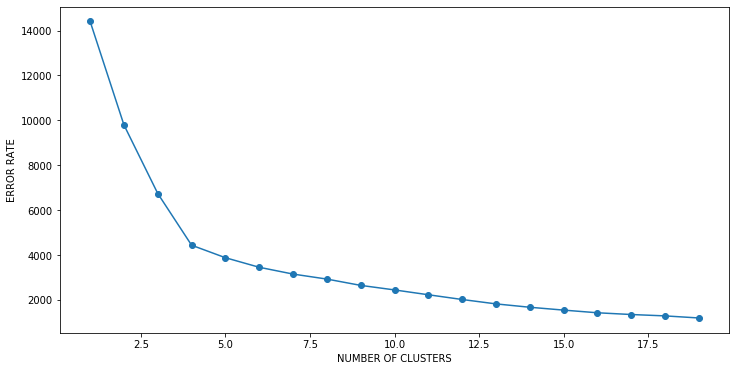

In [88]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df.cluster_count,cluster_df.error_rate,marker="o")
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('ERROR RATE')

The above graph is indicating that 4 is the best number of clusters to be used 

In [89]:
# Chekcing for silhoutee score and concluding about the number of clusters to be used
no_of_clusters= range(2,10)
silhouette_score=[]
for num_clusters in no_of_clusters:
    cluster_model=KMeans(n_clusters=num_clusters)
    cluster_labels=cluster_model.fit_predict(cr_reduced)
    silhouette_value=metrics.silhouette_score(cr_reduced,cluster_labels)
    silhouette_score.append( silhouette_value)
    print('For n_cluster equal to ',num_clusters,' The silhouette score is ',silhouette_value)
    
    

For n_cluster equal to  2  The silhouette score is  0.32085103622218164
For n_cluster equal to  3  The silhouette score is  0.4123137200282487
For n_cluster equal to  4  The silhouette score is  0.4999647157167272
For n_cluster equal to  5  The silhouette score is  0.44911289409212724
For n_cluster equal to  6  The silhouette score is  0.42573179125367183
For n_cluster equal to  7  The silhouette score is  0.4076151159703329
For n_cluster equal to  8  The silhouette score is  0.41556744334300794
For n_cluster equal to  9  The silhouette score is  0.4114366903390226


In [90]:
sil_df=pd.DataFrame({'number_of_clusters':range(2,10),'silhouette_score':silhouette_score})

In [91]:
sil_df

,number_of_clusters,silhouette_score
0,2,0.320851
1,3,0.412314
2,4,0.499965
3,5,0.449113
4,6,0.425732
5,7,0.407615
6,8,0.415567
7,9,0.411437


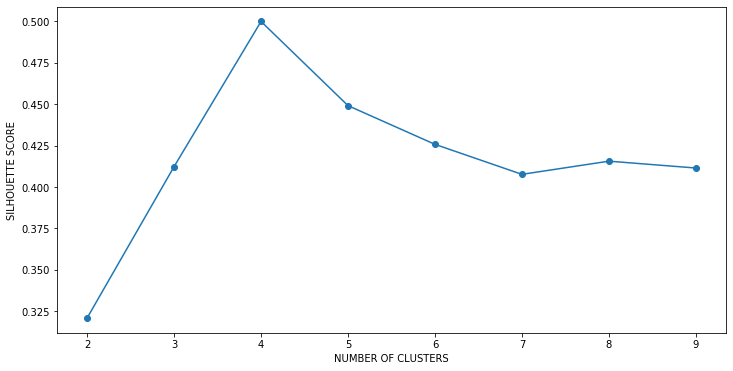

In [92]:
fig=plt.subplots(figsize=(12,6))
plt.plot(sil_df.number_of_clusters,sil_df.silhouette_score,marker='o')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('SILHOUETTE SCORE')
plt.show()

As seen from the above silhouette  graph the optimum number of clusters are found to be 4, hence finalising 4 as number of clusters

In [93]:
# Applying KMeans with 4 clusters
clusters_4=KMeans(n_clusters=4,random_state=123).fit(cr_reduced)


In [94]:
pd.Series(clusters_4.labels_).value_counts()

1    2773
3    2259
2    2044
0    1874
dtype: int64

In [95]:
# adding cluster groups
cr6_df['cluster_group']=clusters_4.labels_

In [96]:
cr6_df.head()

,0,1,2,3,4,5,cluster_group
0,-0.389508,0.777088,0.153451,0.019797,-0.360054,-0.065131,3
1,-0.981641,-0.098787,-0.516721,0.248820,0.380951,-0.050973,2
2,0.063143,-0.533794,0.981312,-0.438262,0.161855,-0.324055,0
3,-0.614643,-0.317294,0.979482,0.231460,-0.254940,0.184293,0
4,-0.662582,-0.231508,0.740936,-0.292074,-0.186893,-0.300374,0


In [97]:
def scatter_plot(feature1,feature2,feature3,feature4):
    fig,ax=plt.subplots(1,2,figsize=(16,8))
    ax[0].scatter(feature1,feature2,c=clusters_4.labels_,cmap='viridis_r')
    ax[0].set_xlabel('feature1')
    ax[0].set_ylabel('feature2')
    
    ax[1].scatter(feature3,feature4,c=clusters_4.labels_,cmap='viridis_r')
    ax[1].set_xlabel('feature3')
    ax[1].set_ylabel('feature4')

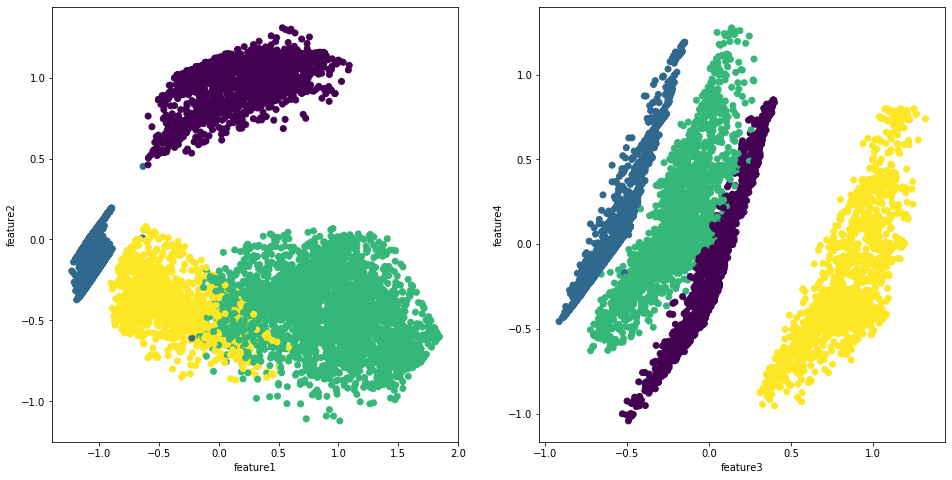

In [98]:
scatter_plot(cr6_df.iloc[:,0],cr6_df.iloc[:,1],cr6_df.iloc[:,2],cr6_df.iloc[:,3])

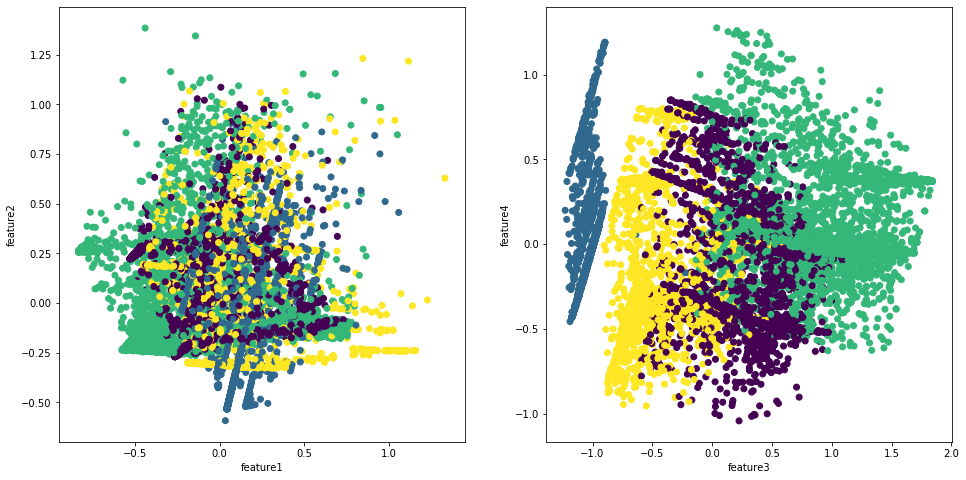

In [99]:
scatter_plot(cr6_df.iloc[:,4],cr6_df.iloc[:,5],cr6_df.iloc[:,0],cr6_df.iloc[:,3])

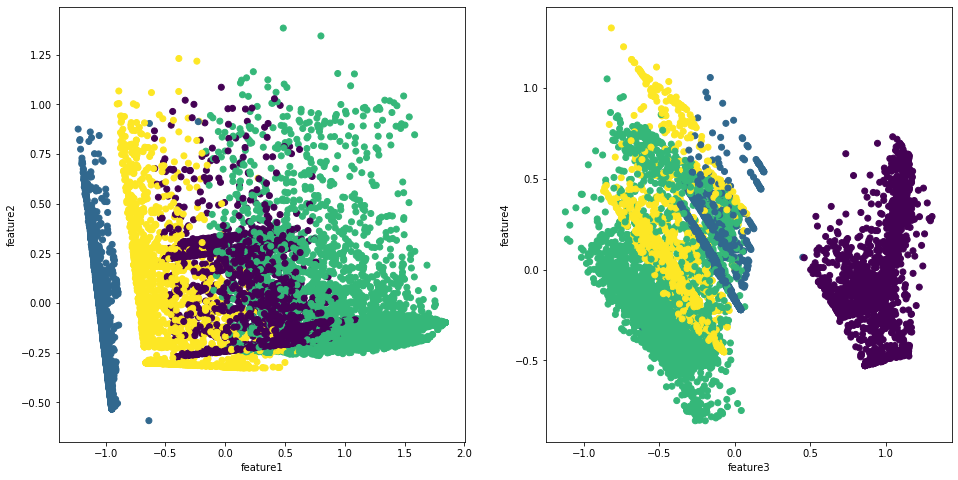

In [100]:
scatter_plot(cr6_df.iloc[:,0],cr6_df.iloc[:,5],cr6_df.iloc[:,1],cr6_df.iloc[:,4])

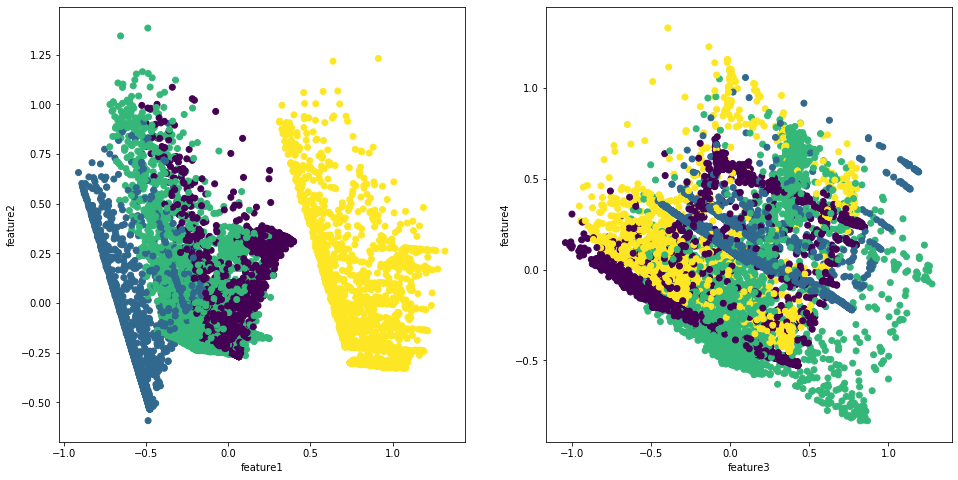

In [101]:
scatter_plot(cr6_df.iloc[:,2],cr6_df.iloc[:,5],cr6_df.iloc[:,3],cr6_df.iloc[:,4])

# From all of the above scatter plots, it can be concluded that principal component 1 and 2 are distinguishing clusters clearly

C:\Users\rakshith\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rakshith\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


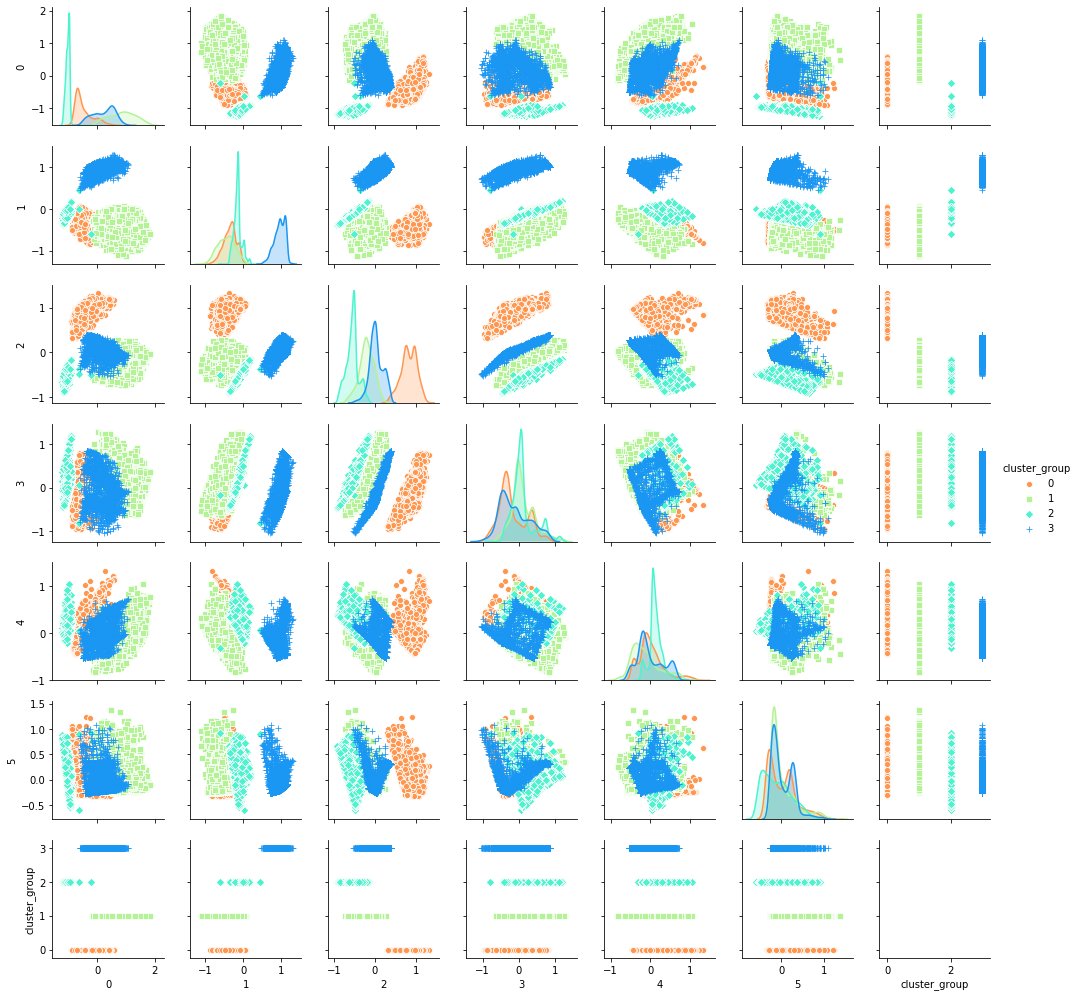

In [102]:
# Plotting scatter plot using SNS
sns.pairplot(cr6_df,hue='cluster_group', palette= 'rainbow_r',height=2,markers=['o','s','D','+'])

# From the above pair plot following insights can be drawn
1. PC1,PC2,PC3 are clearly distinguishing the clusters
2. When PC3,PC4,PC5 plotted against PC3,PC4,PC5 the clusters are not clearly distinguishable
3. From the distribution plot shown in diagonal,we can conclude that cluster group 3 is higher in number except in case of PC5.


In [103]:
# Assigning cluster group to real data set
credit_data=pd.read_csv("credit-card-data.csv")

In [104]:
credit_data.shape

(8950, 18)

In [105]:
credit_data['cluster_group']=clusters_4.labels_

In [106]:
credit_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_group
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [107]:
# converting Tenure into 4 categories to validate clusters
credit_data.loc[:,'TENURE']=np.where(credit_data.loc[:,'TENURE']<9,9,credit_data.loc[:,'TENURE'])

In [108]:
credit_data['TENURE'].value_counts()

12    7584
9      765
11     365
10     236
Name: TENURE, dtype: int64

In [109]:
pd.crosstab(credit_data['TENURE'],credit_data['cluster_group'])

cluster_group,0,1,2,3
TENURE,,,,
9,173,123,247,222
10,60,51,71,54
11,86,81,125,73
12,1555,2518,1601,1910


Clusters are not based on tenure, hence ruling out the validation using crosstab

# Using 5 PC's to create clusters

In [110]:
pc5=PCA(n_components=5).fit(cr_data)
cr_reduced5=pc5.fit_transform(cr_data)

In [111]:
cr_df5=pd.DataFrame(cr_reduced5)

In [112]:
cr_df5.head()

,0,1,2,3,4
0,-0.389508,0.777088,0.153451,0.019797,-0.360054
1,-0.981641,-0.098787,-0.516721,0.248820,0.380951
2,0.063143,-0.533794,0.981312,-0.438262,0.161855
3,-0.614643,-0.317294,0.979482,0.231460,-0.254940
4,-0.662582,-0.231508,0.740936,-0.292074,-0.186893


In [113]:
# Variance explained by each of PC's
pd.Series(pc5.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(5)]) 

PC_0    0.360906
PC_1    0.195892
PC_2    0.140968
PC_3    0.081305
PC_4    0.057757
dtype: float64

In [114]:
pc5.components_.T # Value's carried by PC's of all 17 features 

array([[ 9.85251885e-02, -1.58908758e-01, -2.17852957e-01,
        -6.63897065e-01,  2.64644463e-01],
       [ 1.95209534e-01, -2.85434413e-01,  1.37398819e-01,
         3.15977286e-02,  1.71064997e-01],
       [ 2.52370777e-01,  3.30963481e-02, -1.06774671e-01,
        -5.34111269e-03,  6.04519728e-02],
       [ 4.60216028e-01,  9.48256909e-02,  4.97414684e-02,
        -1.61111353e-01,  8.69750560e-02],
       [ 2.01669470e-01, -2.97184494e-01,  1.65846948e-01,
        -4.89964863e-03,  2.04308057e-01],
       [ 4.19590941e-01,  2.32476119e-01, -1.72090981e-01,
        -1.08034081e-01, -4.69313080e-02],
       [-9.80239126e-02, -1.03776318e-01, -1.73660625e-01,
        -2.28554649e-01,  1.31506302e-01],
       [-1.09715872e-01, -1.26239649e-01, -2.09855562e-01,
        -2.87044760e-01,  1.64821443e-01],
       [ 2.61922682e-01, -9.67684090e-02, -2.63029646e-02,
        -3.35332053e-02,  1.08872049e-01],
       [ 1.50085571e-01,  1.52731390e-01,  1.12245558e-01,
         4.22989773e-01

In [115]:
pc5_df=pd.DataFrame(pc5.components_.T,columns=['PC_'+str(i) for i in range(5)],index=cr_data.columns)

In [116]:
pc5_df

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE_FREQUENCY,0.098525,-0.158909,-0.217853,-0.663897,0.264644
ONEOFF_PURCHASES,0.195210,-0.285434,0.137399,0.031598,0.171065
INSTALLMENTS_PURCHASES,0.252371,0.033096,-0.106775,-0.005341,0.060452
PURCHASES_FREQUENCY,0.460216,0.094826,0.049741,-0.161111,0.086975
ONEOFF_PURCHASES_FREQUENCY,0.201669,-0.297184,0.165847,-0.004900,0.204308
PURCHASES_INSTALLMENTS_FREQUENCY,0.419591,0.232476,-0.172091,-0.108034,-0.046931
CASH_ADVANCE_FREQUENCY,-0.098024,-0.103776,-0.173661,-0.228555,0.131506
CASH_ADVANCE_TRX,-0.109716,-0.126240,-0.209856,-0.287045,0.164821
PURCHASES_TRX,0.261923,-0.096768,-0.026303,-0.033533,0.108872
PRC_FULL_PAYMENT,0.150086,0.152731,0.112246,0.422990,0.757406


In [117]:
# To find out the best number of clusters
no_of_clusters=range(1,20)
cluster_errors=[]
for num_clusters in no_of_clusters:
    clusters=KMeans(num_clusters).fit(cr_reduced5)
    cluster_errors.append(clusters.inertia_)

In [118]:
cluster5_df=pd.DataFrame({'cluster_count':no_of_clusters,'error_rate':cluster_errors})

In [119]:
cluster5_df.head()

,cluster_count,error_rate
0,1,13580.519878
1,2,8972.272488
2,3,5923.012571
3,4,3638.450995
4,5,3088.930597


Text(0, 0.5, 'ERROR RATE')

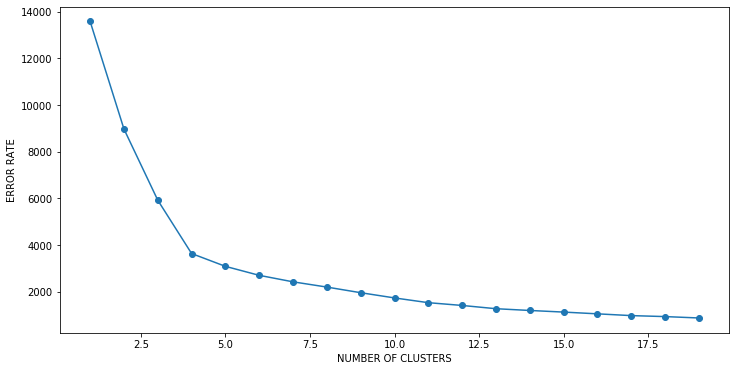

In [120]:
plt.figure(figsize=(12,6))
plt.plot(cluster5_df.cluster_count,cluster5_df.error_rate,marker="o")
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('ERROR RATE')

With 5 PC's, 4 still remains the optimium number of clusters

In [121]:
# Chekcing for silhoutee score and concluding about the number of clusters to be used
no_of_clusters= range(2,10)
silhouette_score=[]
for num_clusters in no_of_clusters:
    cluster_model=KMeans(n_clusters=num_clusters)
    cluster_labels=cluster_model.fit_predict(cr_reduced5)
    silhouette_value=metrics.silhouette_score(cr_reduced5,cluster_labels)
    silhouette_score.append( silhouette_value)
    print('For n_cluster equal to ',num_clusters,' The silhouette score is ',silhouette_value)

For n_cluster equal to  2  The silhouette score is  0.3425186542559036
For n_cluster equal to  3  The silhouette score is  0.44413174102523106
For n_cluster equal to  4  The silhouette score is  0.5433092506547865
For n_cluster equal to  5  The silhouette score is  0.49328474008949746
For n_cluster equal to  6  The silhouette score is  0.462052488552978
For n_cluster equal to  7  The silhouette score is  0.4425481730857298
For n_cluster equal to  8  The silhouette score is  0.46028277910440984
For n_cluster equal to  9  The silhouette score is  0.4580586906156894


In [122]:
sil_df5=pd.DataFrame({'number_of_clusters':range(2,10),'silhouette_score':silhouette_score})

In [123]:
sil_df5

,number_of_clusters,silhouette_score
0,2,0.342519
1,3,0.444132
2,4,0.543309
3,5,0.493285
4,6,0.462052
5,7,0.442548
6,8,0.460283
7,9,0.458059


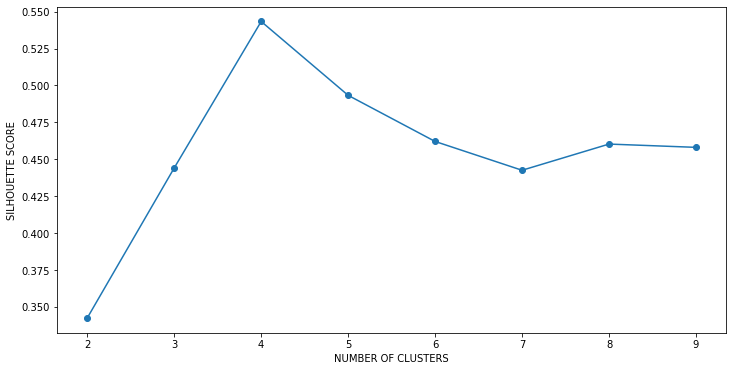

In [124]:
fig=plt.subplots(figsize=(12,6))
plt.plot(sil_df5.number_of_clusters,sil_df5.silhouette_score,marker='o')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('SILHOUETTE SCORE')
plt.show()

In [125]:
# Applying KMeans with 4 clusters
clusters_4=KMeans(n_clusters=4,random_state=123).fit(cr_reduced5)

In [126]:
# adding cluster groups
cr_df5['cluster_group']=clusters_4.labels_

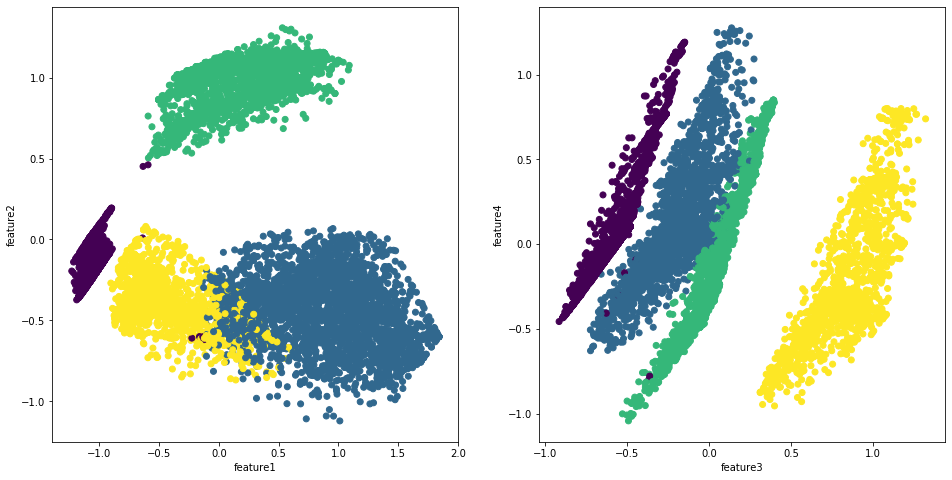

In [127]:
# Plotting
scatter_plot(cr_df5.iloc[:,0],cr_df5.iloc[:,1],cr_df5.iloc[:,2],cr_df5.iloc[:,3])

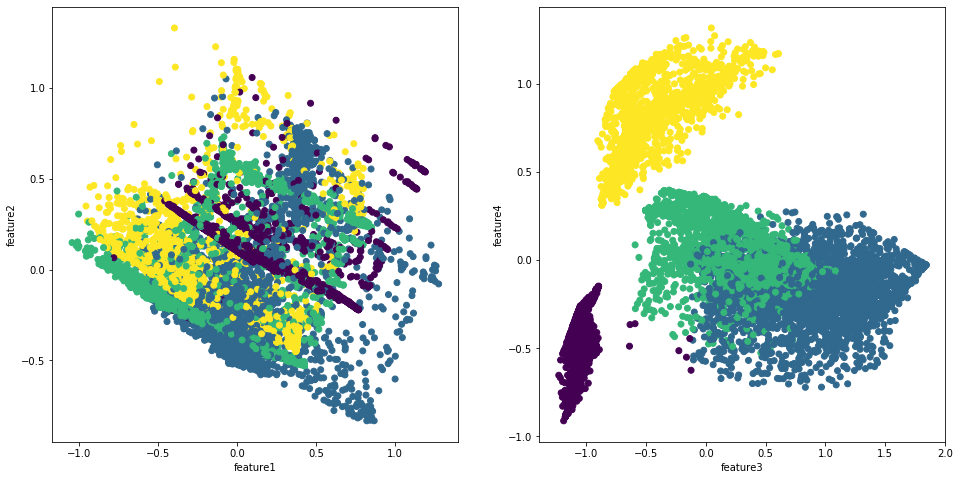

In [128]:
scatter_plot(cr_df5.iloc[:,3],cr_df5.iloc[:,4],cr_df5.iloc[:,0],cr_df5.iloc[:,2])

C:\Users\rakshith\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rakshith\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


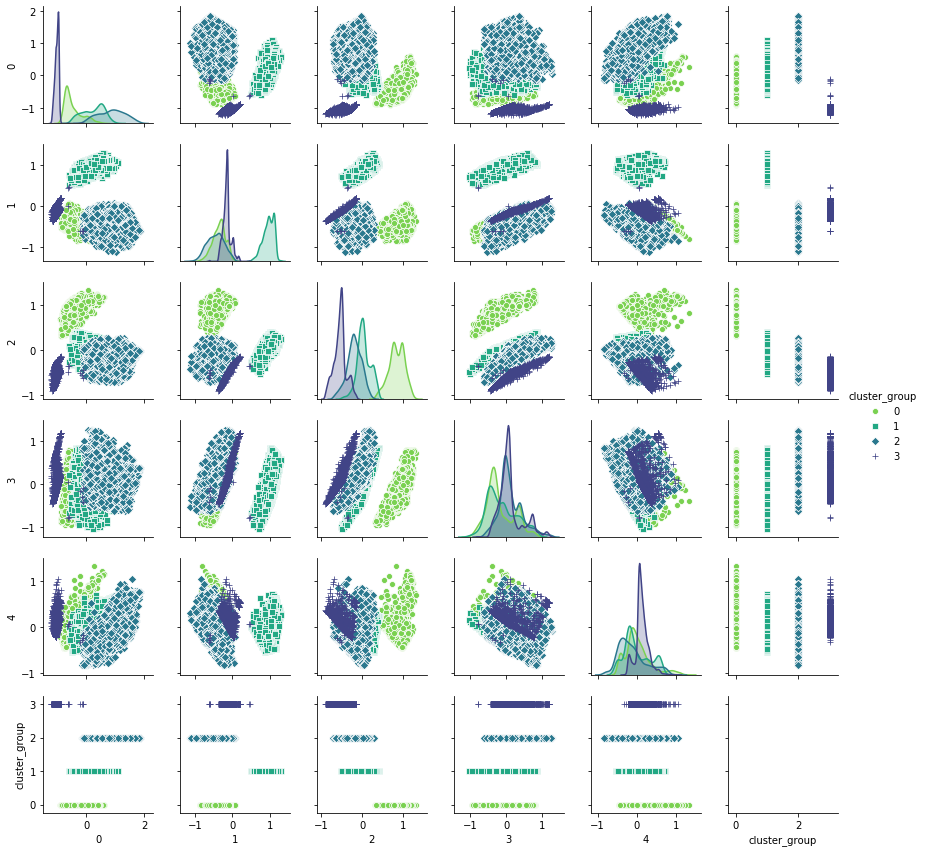

In [129]:
# Plotting scatter plot using SNS
sns.pairplot(cr_df5,hue='cluster_group', palette= 'viridis_r',height=2,markers=['o','s','D','+'])

# CONCLUSIONS
1. With principal components equal to 5 & 6 , The best number of clusters to be used are 4, as depicted in Elbow plot and silhouette plot.
2. Higher the silhouette score better the cluster groups i.e less intra variance, and greater inter cluster variance.
3. silhouette score with 6 PC's at best number of clusters i.e 4 is 0.49996471571672546
4. silhouette score with 5 PC's at best number of clusters i.e 4 is 0.5433092506547536

# From Above Conclusions, 5 PC's with 4 number of clusters is turning out to be the better model, Hence clusters would be created using same.

# Final Cluster Model

In [130]:
final_clusters=KMeans(n_clusters=4,random_state=123).fit(cr_reduced5)

In [131]:
# Assigning cluster levels to original data whose missing values are imputed with mean and outliers treated
credit_original_data['cluster_group']=final_clusters.labels_

In [132]:
credit_original_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,TENURE,month_avg_purchase,month_cash_advance,usage_limit,min_payment_ratio,NONE_of_PURCHASE,BOTH_of_PURCHASE,ONEOFF_ONLY,INSTALLMENT_ONLY,cluster_group
0,0.005222,0.590909,0.022075,0.000000,0.050892,0.00000,0.166667,0.000000,0.083333,0.00000,...,1.0,0.011038,0.000000,0.002571,0.000211,0.0,0.0,0.0,1.0,1
1,0.408910,0.795455,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.28125,...,1.0,0.000000,0.500000,0.028755,0.000559,1.0,0.0,0.0,0.0,3
2,0.318595,1.000000,0.178908,0.334761,0.000000,0.00000,1.000000,1.000000,0.000000,0.00000,...,1.0,0.089454,0.000000,0.020911,0.000145,0.0,0.0,1.0,0.0,0
3,0.212810,0.181818,0.346861,0.649025,0.000000,0.04619,0.083333,0.083333,0.000000,0.09375,...,1.0,0.173431,0.023095,0.013968,0.000000,0.0,0.0,1.0,0.0,0
4,0.104411,1.000000,0.003702,0.006928,0.000000,0.00000,0.083333,0.083333,0.000000,0.00000,...,1.0,0.001851,0.000000,0.042830,0.000405,0.0,0.0,1.0,0.0,0


In [133]:
credit_original_data.shape

(8950, 26)

In [134]:
credit_original_data['cluster_group'].value_counts()

2    2770
1    2258
3    2048
0    1874
Name: cluster_group, dtype: int64

In [135]:
pd.crosstab(credit_original_data['ONEOFF_ONLY'],credit_original_data['cluster_group'])
# All customers making one-off type purchases are belonging to cluster0

cluster_group,0,1,2,3
ONEOFF_ONLY,,,,
0.0,0,2258,2770,2048
1.0,1874,0,0,0


In [136]:
pd.crosstab(credit_original_data['INSTALLMENT_ONLY'],credit_original_data['cluster_group'])
# All customers making installment purchases are belonging to cluster 1 , except for 2 customers

cluster_group,0,1,2,3
INSTALLMENT_ONLY,,,,
0.0,1874,0,2770,2046
1.0,0,2258,0,2


In [137]:
pd.crosstab(credit_original_data['BOTH_of_PURCHASE'],credit_original_data['cluster_group'])
# All customers making both type of purchases are grouped  into cluster 2 , except for 4 customers 

cluster_group,0,1,2,3
BOTH_of_PURCHASE,,,,
0.0,1874,2258,0,2044
1.0,0,0,2770,4


In [138]:
pd.crosstab(credit_original_data['NONE_of_PURCHASE'],credit_original_data['cluster_group'])
# All customers making none of the purchases are grouped into cluster 3.

cluster_group,0,1,2,3
NONE_of_PURCHASE,,,,
0.0,1874,2258,2770,6
1.0,0,0,0,2042


In [139]:
# From the above data will select features that are important and can give meaningful information about customer behaviour
col_list=['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','month_avg_purchase','month_cash_advance','usage_limit','min_payment_ratio']

In [140]:
cluster_df=credit_original_data.groupby('cluster_group').apply(lambda x: x[col_list].mean()).T


In [141]:
cluster_df

cluster_group,0,1,2,3
BALANCE,0.180050,0.103576,0.220964,0.269154
PURCHASES,0.163436,0.118991,0.419465,0.000154
ONEOFF_PURCHASES,0.272639,0.000000,0.413712,0.000169
INSTALLMENTS_PURCHASES,0.000000,0.257201,0.380137,0.000147
CASH_ADVANCE,0.161909,0.077354,0.135798,0.374637
month_avg_purchase,0.087350,0.062597,0.214428,0.000077
month_cash_advance,0.088438,0.042516,0.072212,0.206889
usage_limit,0.023823,0.016918,0.021904,0.035850
min_payment_ratio,0.000782,0.001931,0.000988,0.001298


WILL PLOT ABOVE INFORMATION TO DRAW OUT RELEVANT AND MEANINGFUL INFORMATION

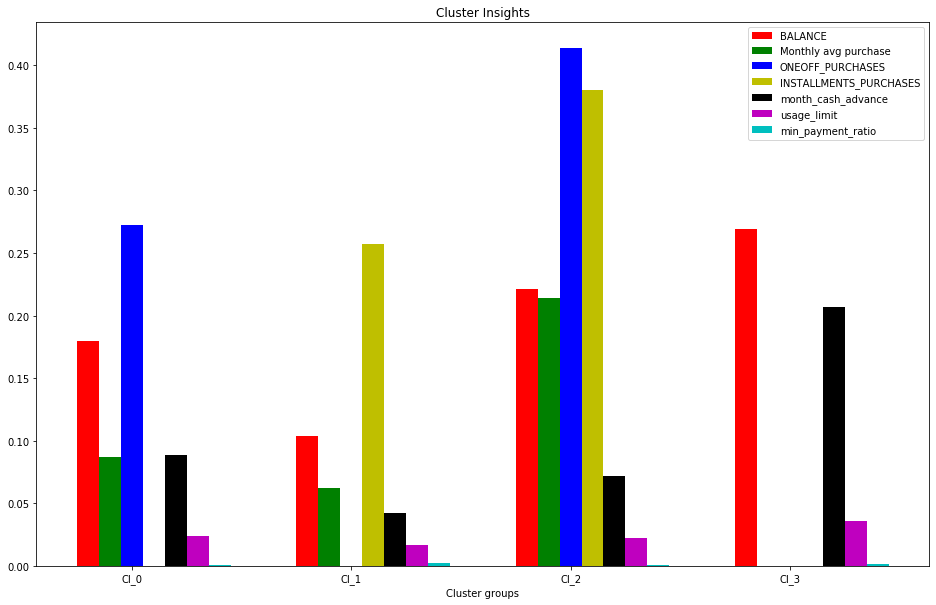

In [142]:
plt.subplots(figsize=(16,10))
x_values=np.arange(len(cluster_df.columns))
plt.bar(x_values,cluster_df.loc['BALANCE',:].values,color='r',label='BALANCE',width=0.1)
plt.bar(x_values+0.1,cluster_df.loc['month_avg_purchase',:].values,color='g',label='Monthly avg purchase',width=0.1)
plt.bar(x_values+0.2,cluster_df.loc['ONEOFF_PURCHASES',:].values,color='b',label='ONEOFF_PURCHASES',width=0.1)
plt.bar(x_values+0.3,cluster_df.loc['INSTALLMENTS_PURCHASES',:].values,color='y',label='INSTALLMENTS_PURCHASES',width=0.1)
plt.bar(x_values+0.4,cluster_df.loc['month_cash_advance',:].values,color='k',label='month_cash_advance',width=0.1)
plt.bar(x_values+0.5,cluster_df.loc['usage_limit',:].values,color='m',label='usage_limit',width=0.1)
plt.bar(x_values+0.6,cluster_df.loc['min_payment_ratio',:].values,color='c',label='min_payment_ratio',width=0.1)

plt.xlabel("Cluster groups")
plt.title("Cluster Insights")
plt.xticks(x_values + 0.2, ('Cl_0', 'Cl_1', 'Cl_2', 'Cl_3'))
plt.legend()
plt.show()

# Insights about the customers, derived from clusters they are belonging to.

# 1. CLUSTER 0
1. All these credit card holders are making one-off purchases only
2. They have the second lowest BALANCE maintained
3. These credit card holders are second in taking cash in advance
4. They are maintaining comapratively good credit score
5. Monthly average purchases are second highest.

# 2. CLUSTER 1
1. All of these customers are making installment purchases and no one-off purchases being made.
2. They are maintaining a very good credit score i.e low usage limit value
3. These customers are taking least cash in advnce when compared to rest of the customers.
4. These customers are maintaining low BALANCE compared to others.
5. Monthly average purchases are less when compared to cluster 1 and 2


# 3. CLUSTER 2
1. These credit card holders are making both installment and one-off purchases
2. Monthly Average purchases are highest among all the other groups
3. They are maintaining High Balance
4. They are second-least in taking the cash in advance
5. These credit card holders are maintaining a good credit score
6. Overall these customers are making good use of credit card and maintaining good credit score

# 4. CLUSTER 3
1. These customers are making neither of the purchases
2. They are taking high cash in advance(highest amongst all)
3. Monthly average purchases are Zero
4. They are maintaining poor credit score(Least among all)
5. Overall this group contains customers who are performing poor.